In [5]:
from matplotlib import pyplot as plt
import numpy as np

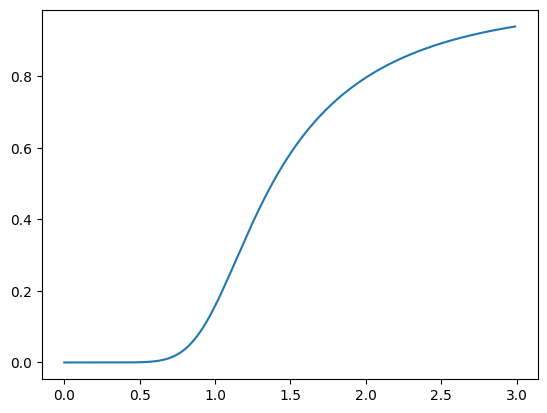

In [12]:
# Problem 6.10
def f(c,x):
    return 1 - np.exp(-c*x)

c = np.arange(0,3,0.01)
x = [1]*len(c)
n = 10

for k in range(len(c)):
    for i in range(n):
        x[k] = f(c[k],x[k])

plt.plot(c,x)

In [19]:
# Problem 6.11b
def f(c,x):
    return 1 - np.exp(-c*x)

c = 2
x = 1
n = 10
xtrue = 1 #starting guess

# find accurate x by iterating many times
for i in range(50):
    x = f(c,x)
xtrue = x

x = 1 # reinitialize
err = 1
j = 0 #counter
while (err > 1e-6):
    x = f(c,x)
    err = x - xtrue
    j += 1
print(x-xtrue)
print(j)

5.010918255887731e-07
14


In [20]:
# Problem 6.11c 

w = 0.5 #starting value
x = 1 # reinitialize
err = 1
err_a
j = 0 #counter
while (err > 1e-6):
    x = (1+w)*f(c,x)-w*x # overrelaxation equation
    err = x - xtrue
    j += 1
print(x-xtrue)
print(j)

2.429632417477734e-07
4


In [24]:
# try for many w
ws = np.linspace(0,5,15)

for i in range(len(ws)):
    w = ws[i]
    x = 1 # reinitialize
    err = 1
    j = 0 #counter
    while (err > 1e-6):
        x = (1+w)*f(c,x)-w*x # overrelaxation equation
        err = x - xtrue
        j += 1
    print(w,j)

0.0 14
0.35714285714285715 7
0.7142857142857143 1
1.0714285714285714 1
1.4285714285714286 1
1.7857142857142858 1
2.142857142857143 1
2.5 1
2.857142857142857 1
3.2142857142857144 1
3.5714285714285716 1
3.928571428571429 1
4.285714285714286 1
4.642857142857143 1
5.0 1


Text(0, 0.5, 'f(x)')

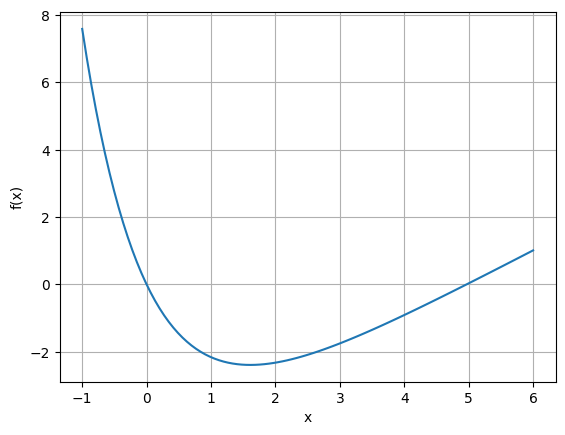

In [31]:
#Problem 6.13 Wien's displacement constant

def f(x):
    return 5*np.exp(-x)+x-5
# plot f(x) to get good guess for x1, x2
# use fact that 0 is obvious root
xrange = np.linspace(-1,6,100)
yrange = [f(x) for x in xrange]
plt.plot(xrange,yrange)
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")

In [33]:
# since x = 0 root is obvious, look for root between x=4.5 and x=5.5
x1 = 4.5
x2 = 5.5
print(f(x1),f(x2)) # check for oposite signs
elim = 1e-6 # given error limit
e = 1 # starting value
while (e > elim):
    xmid = 0.5*(x1+x2)
    fmid = f(xmid)
    if(f(xmid)<0 and f(x1)<0) or(f(xmid)>0 and f(x1)>0):
        x1 = xmid
    else:
        x2 = xmid
    e = np.abs(x1-x2)
xfinal = 0.5*(x1+x2)
print(xfinal)

-0.44445501730878867 0.5204338571923204
4.965114116668701


final parameters:  [1.99898588 1.99898588]


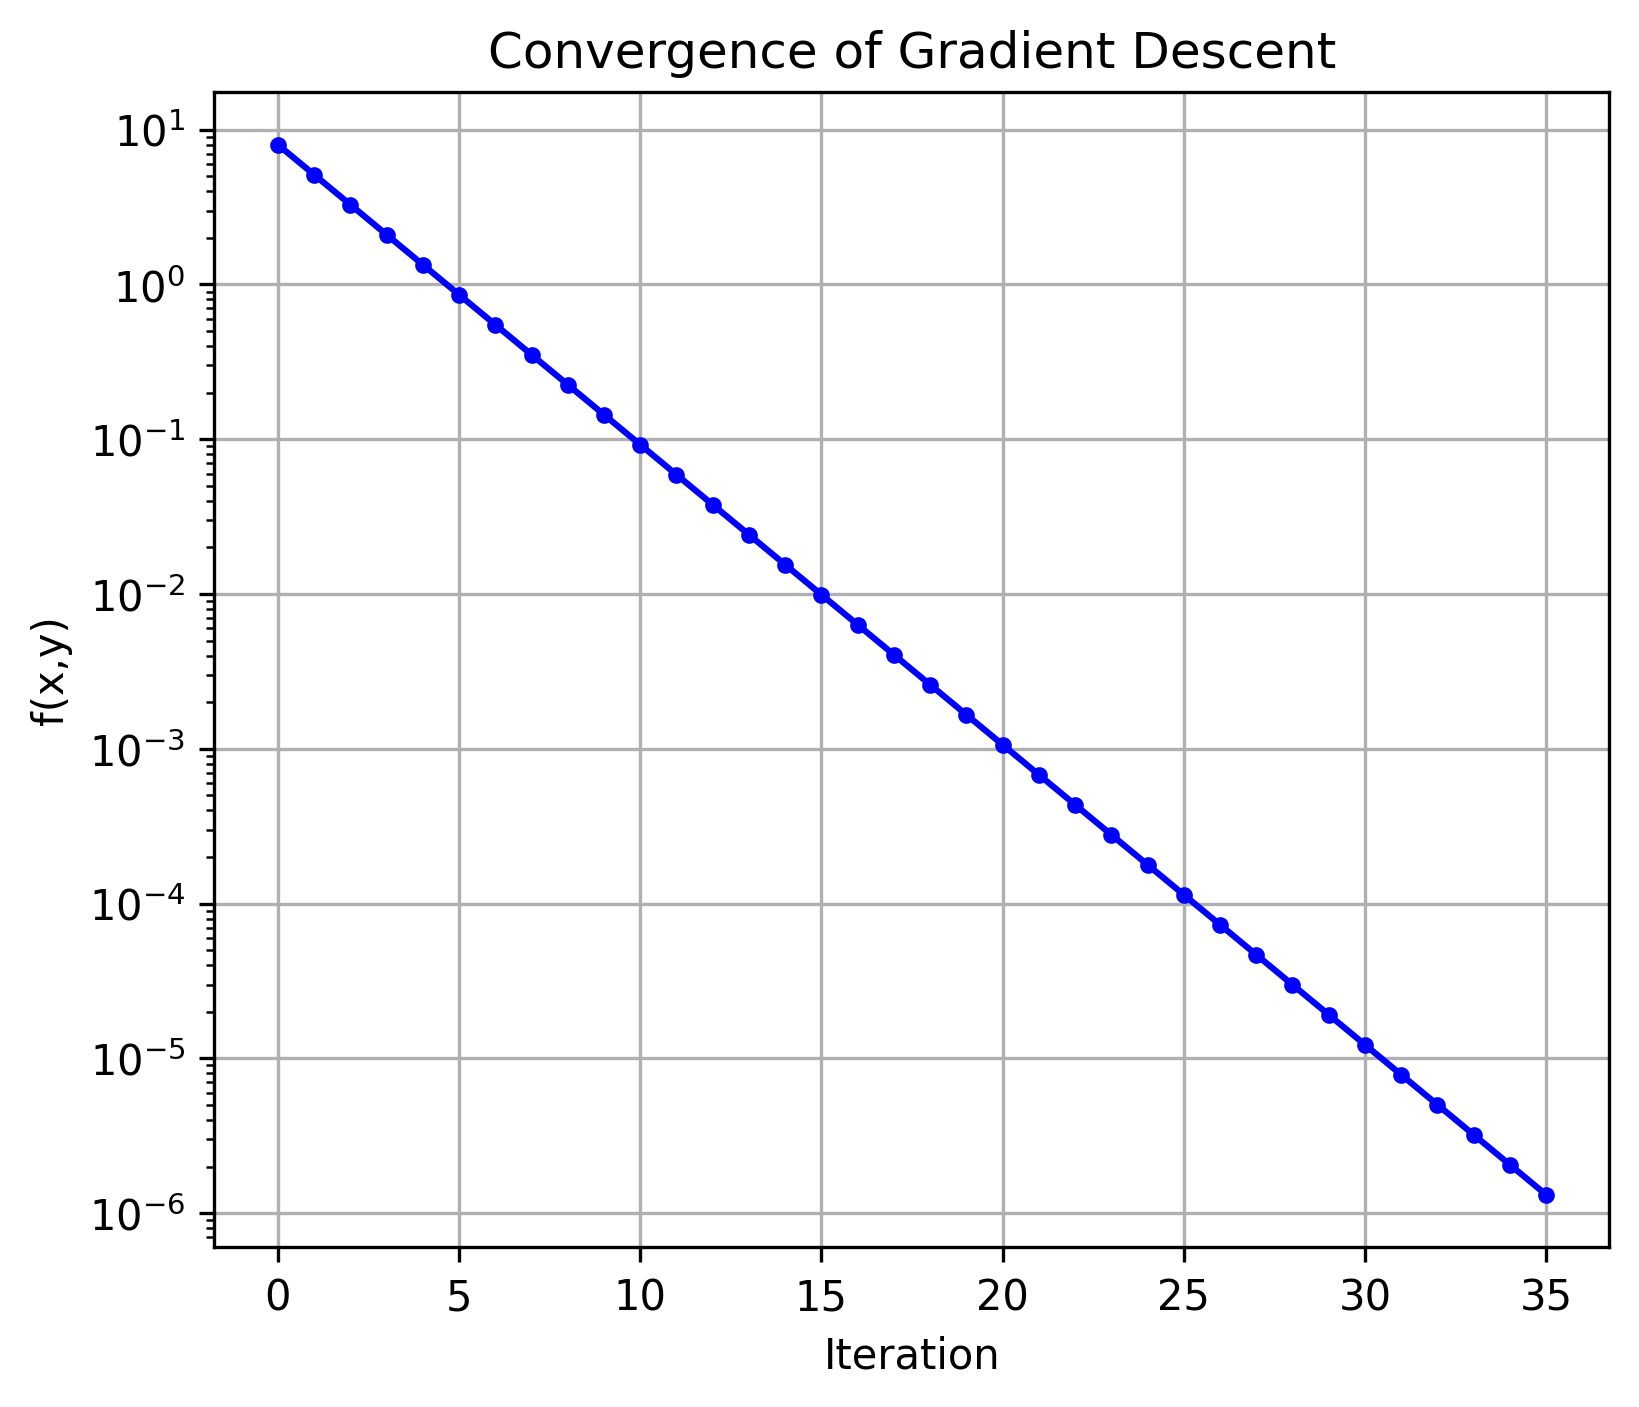

<Figure size 640x480 with 0 Axes>

In [51]:
#Problem 3
def grad_fxn(f,ps,h=1e-6):
    grad = np.zeros_like(ps) # create array of grad in all dimensions
    for i in range(len(ps)):
        step = np.zeros_like(ps)
        step[i] = h
        grad[i] = (f(ps+step) - f(ps-step))/(2*h)
    return grad

# grad descent fxn
def grad_descent(f,init_params,step=0.1,tol=1e-6,iterations=100):
    params = np.array(init_params,dtype=float)
    history = [] 
    for i in range(iterations):
        val = f(params)
        history.append((params.copy(),val))
        grad = grad_fxn(f,params)

        new_params = params - step*grad
        new_val = f(new_params)
        if np.abs(new_val - val) < tol:
            history.append((new_params.copy(),new_val))
            break

        params = new_params
    return params, history

# test on f(x,y) = (x-2)^2 +(y-2)^2
def simple_fxn(params):
    x, y = params
    return (x-2)**2 + (y-2)**2

initial_guess = [0.0,0.0]
final_params, history = grad_descent(simple_fxn, initial_guess, 0.1)
print("final parameters: ", final_params)
values = [h[1] for h in history]
trajectory = [h[0] for h in history]

# plot fxn_value vs iteration
plt.figure(figsize=(6,5),dpi=300)
plt.semilogy(values, 'b.-')
plt.xlabel("Iteration")
plt.ylabel("f(x,y)")
plt.title("Convergence of Gradient Descent")
plt.grid(True)
plt.show()
plt.savefig("hw2_figs/grad_descent_convergence.png")

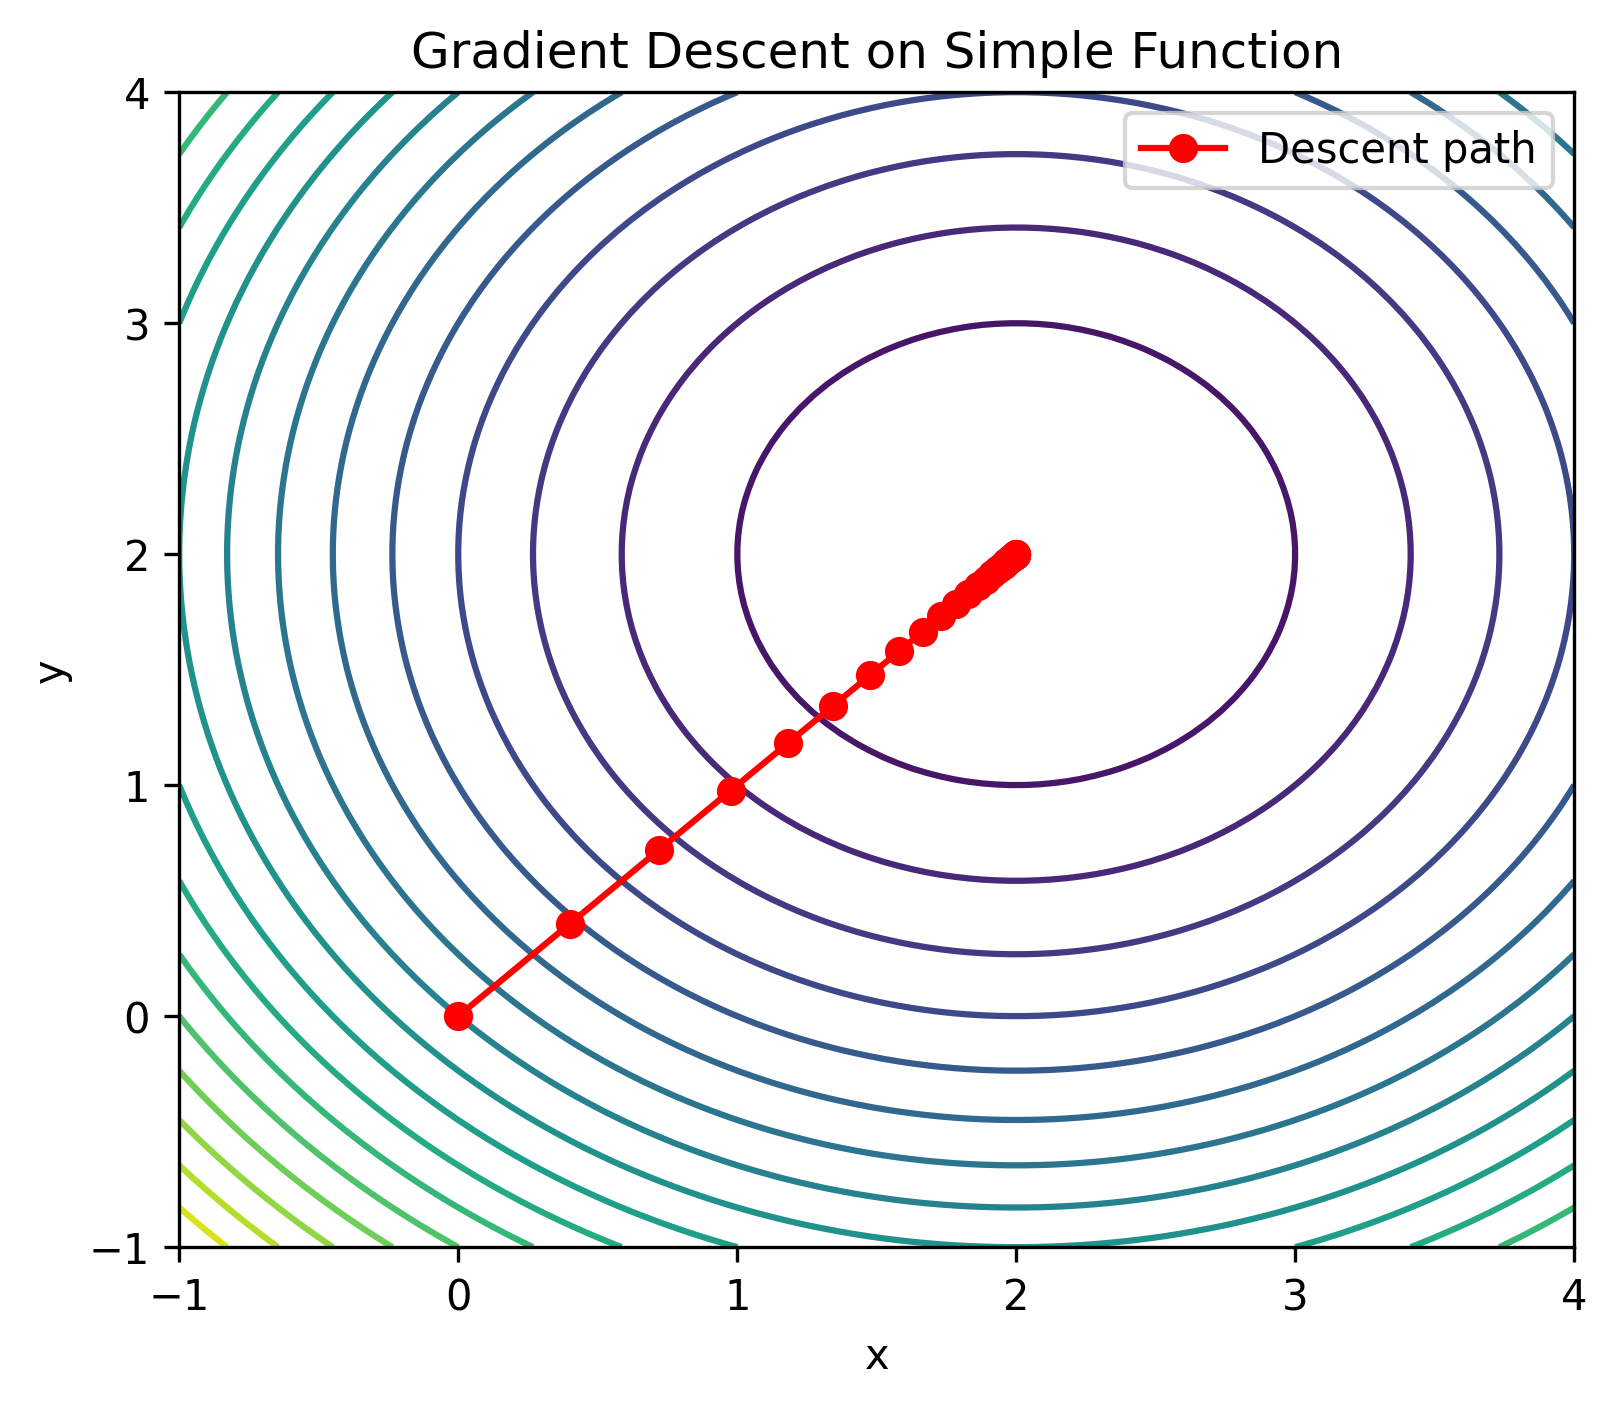

<Figure size 640x480 with 0 Axes>

In [52]:
# plot contour plot
trajectory = np.array([p for p, val in history])

xgrid = np.linspace(-1, 4, 100)
ygrid = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = (X - 2)**2 + (Y - 2)**2

plt.figure(figsize=(6,5),dpi=300)
plt.contour(X, Y, Z, levels=20)
plt.plot(trajectory[:,0], trajectory[:,1], 'ro-', label="Descent path")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Gradient Descent on Simple Function")
plt.show()
plt.savefig("hw2_figs/grad_descent_onfxn.png")

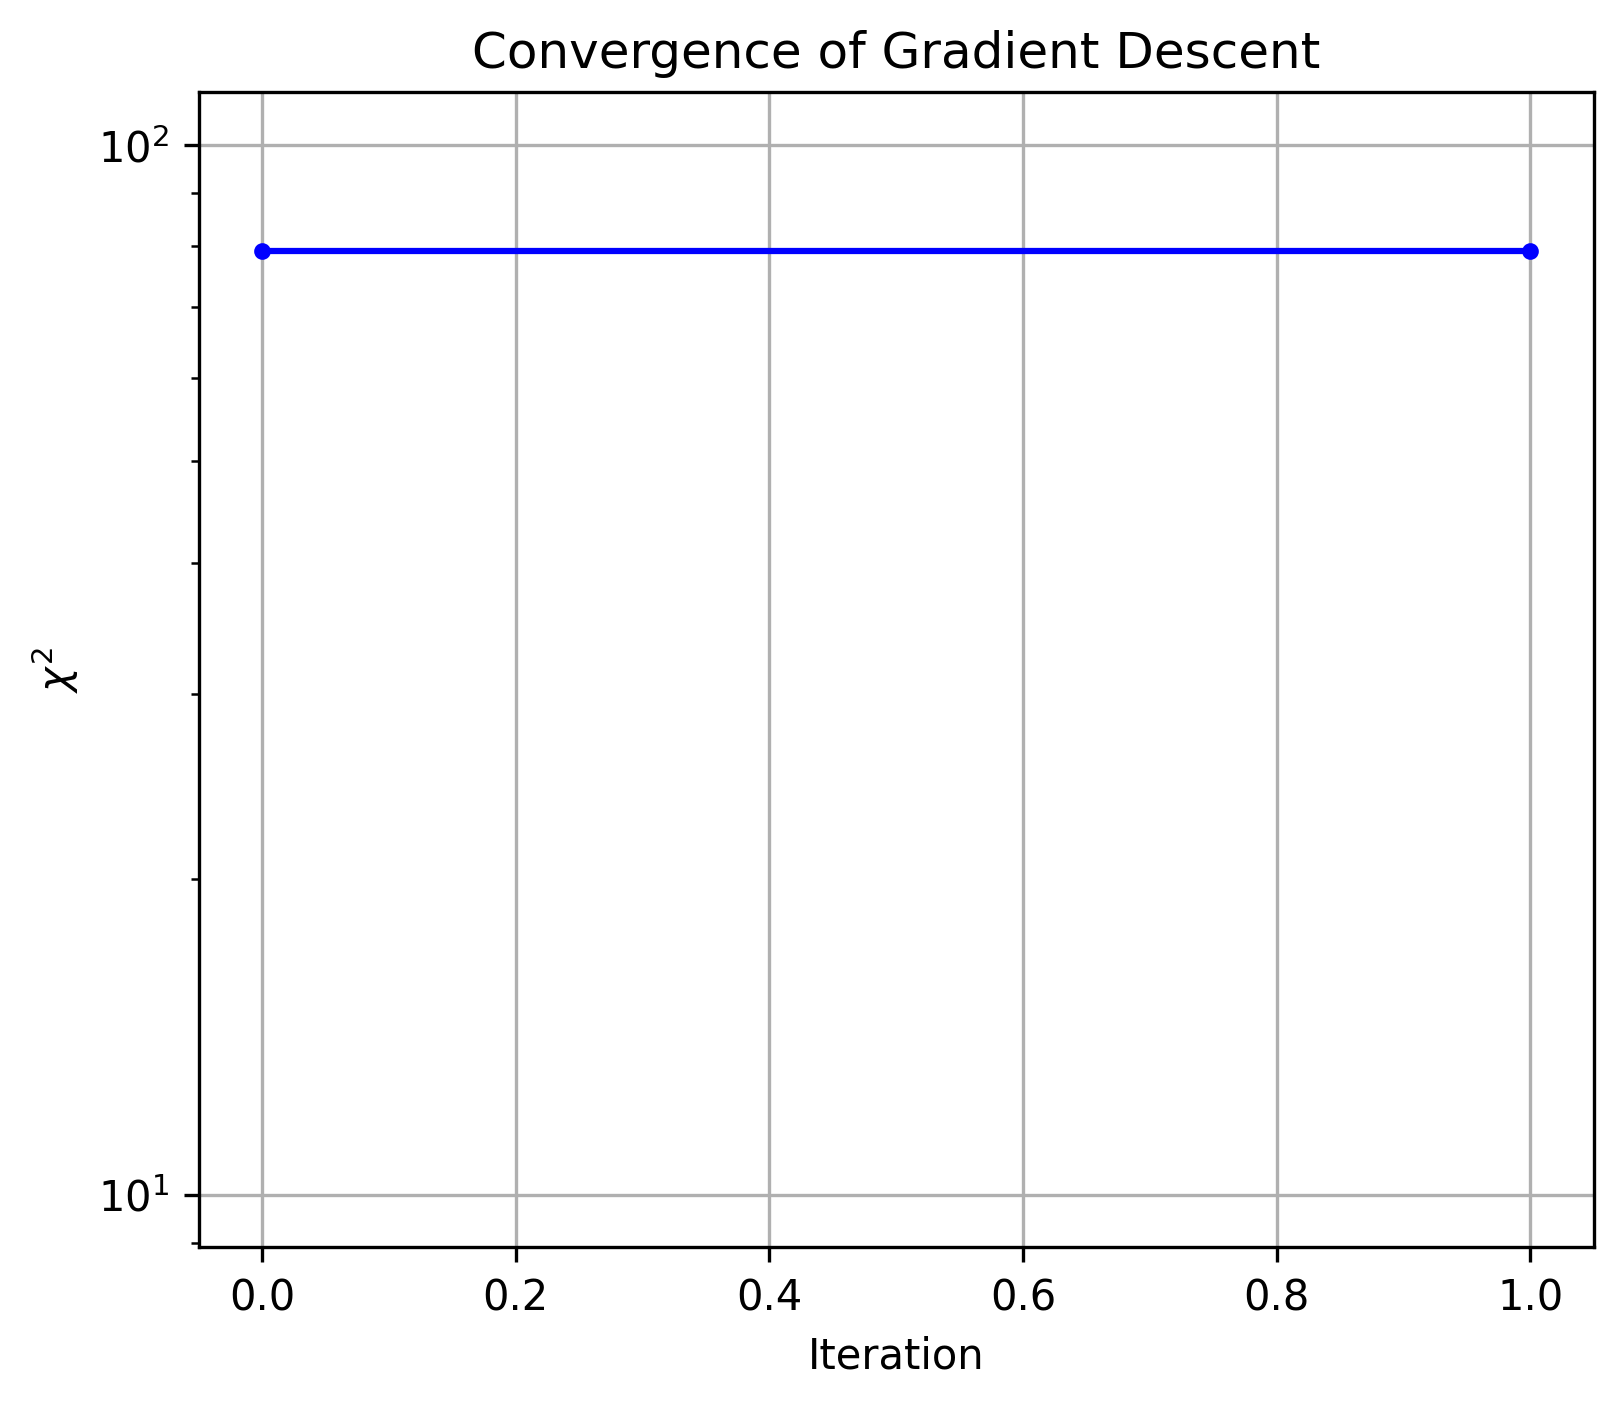

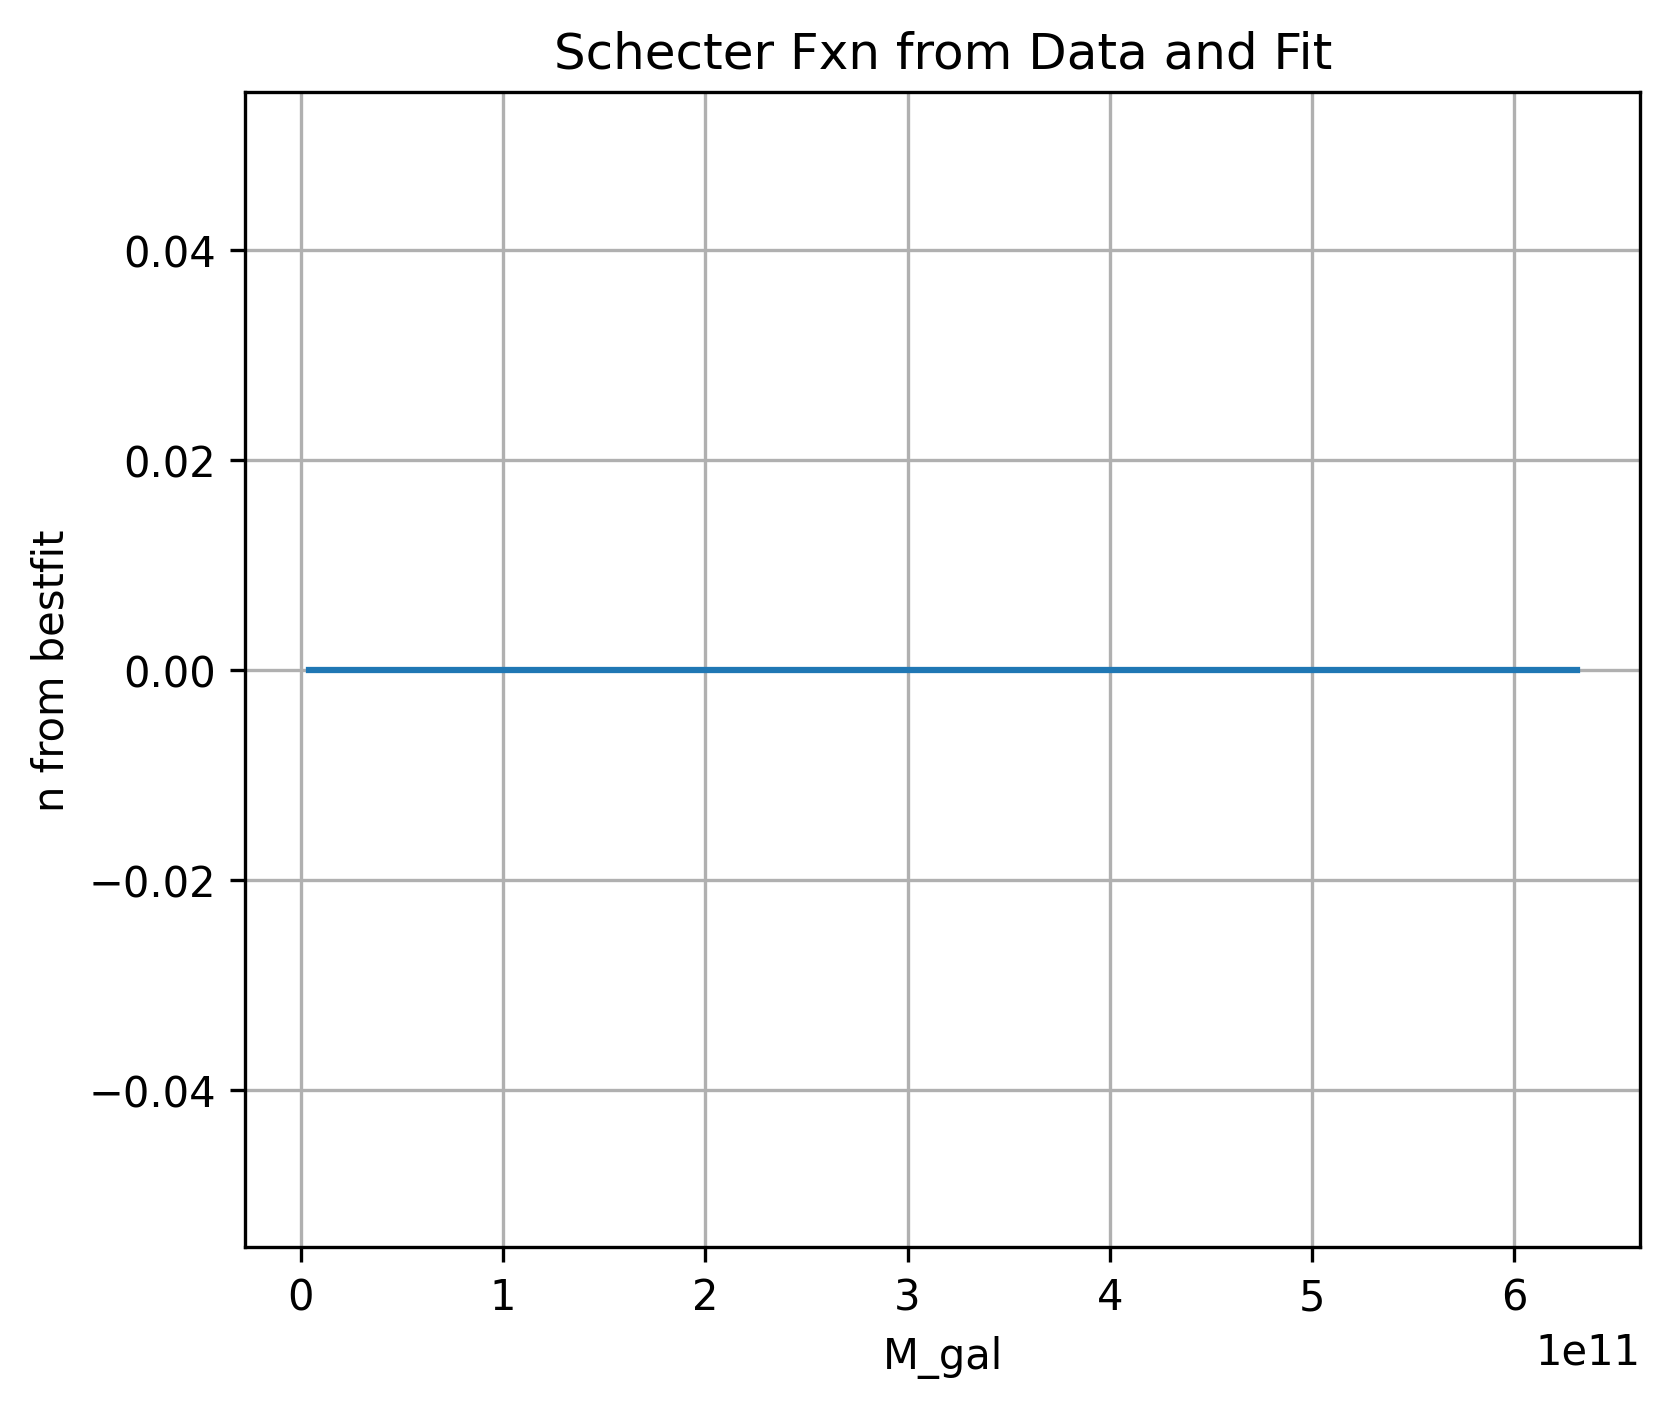

In [65]:
# Work on schechter fxn
def schecter(M,phi,Mstar,alpha):
    return phi*(M/Mstar)**(alpha+1)*np.exp(-M/Mstar)*np.log(10)

# import data
data = np.genfromtxt("smf_cosmos.dat")
log_M_gal = data[:,0]
M_gal = 10**(log_M_gal)
n = data[:,1]
err = data[:,2]

# define chi^2 fxn to compare data to model
def chi2(params, M_gal, n, err):
    phi, Mstar, alpha = params
    n_model = schecter(M_gal,phi,Mstar,alpha)
    return np.sum((n - n_model)/err)

# run gradient descent on chi^2 fxn to optimize params
#def grad_descent(f,init_params,step=0.1,tol=1e-6,iterations=100):
#    return params, history

initial_params = [1,1e5,1]
optimized_params,history = grad_descent(
    lambda p: chi2(p,M_gal,n,err),
    initial_params,step=1e-3,iterations=200)

phi,Mstar,alpha = optimized_params
chi2s = [h[1] for h in history]
n_bestfit = schecter(M_gal,phi,Mstar,alpha)

# plot chi2 vs. iteration
plt.figure(figsize=(6,5),dpi=300)
plt.semilogy(chi2s, 'b.-')
plt.xlabel("Iteration")
plt.ylabel(r'$\chi^2$')
plt.title("Convergence of Gradient Descent")
plt.grid(True)
plt.show()

# plot schtecter fxn
plt.figure(figsize=(6,5),dpi=300)
plt.plot(M_gal,n_bestfit)
plt.xlabel("M_gal")
plt.ylabel(r'n from bestfit')
plt.title("Schecter Fxn from Data and Fit")
plt.grid(True)
plt.show()

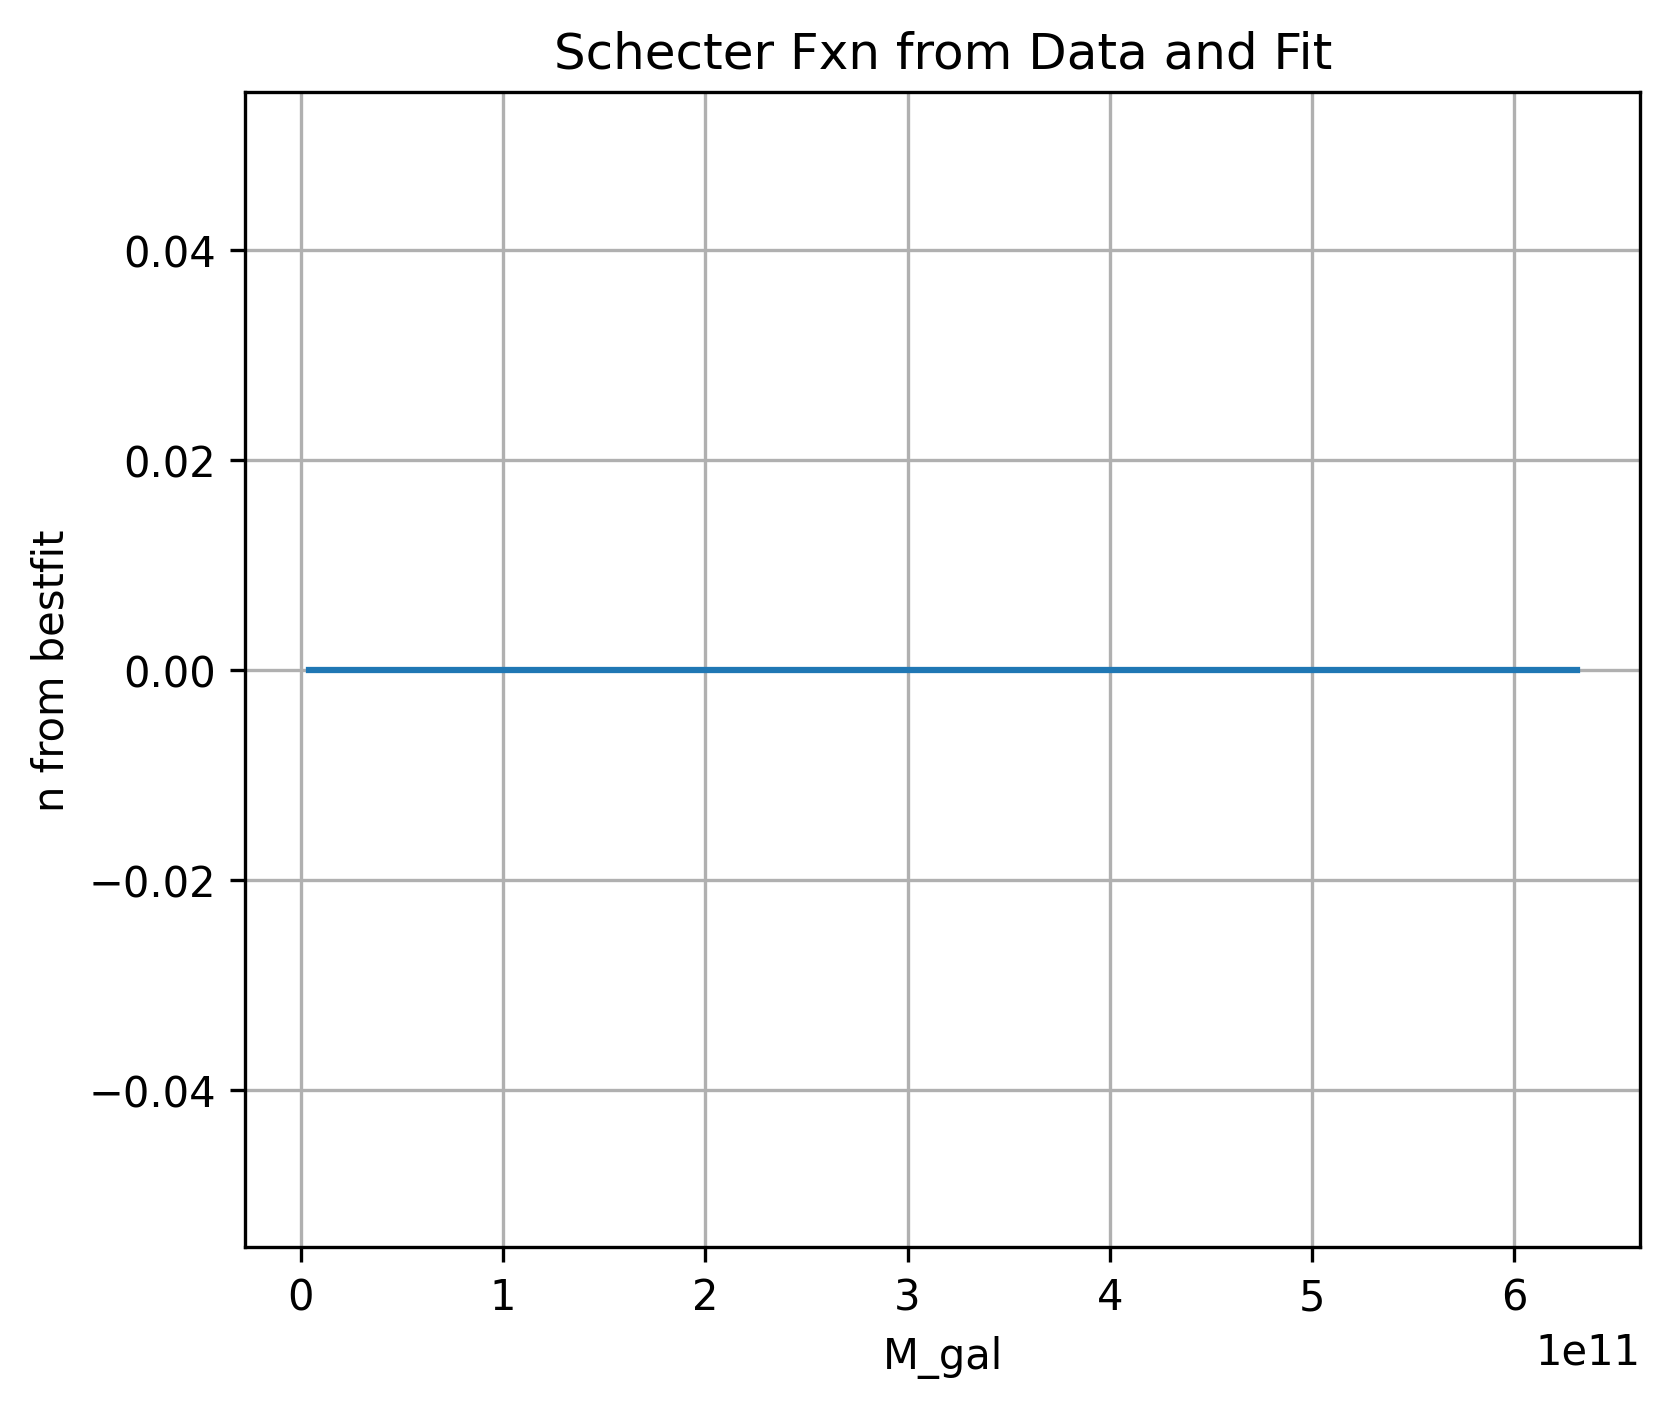